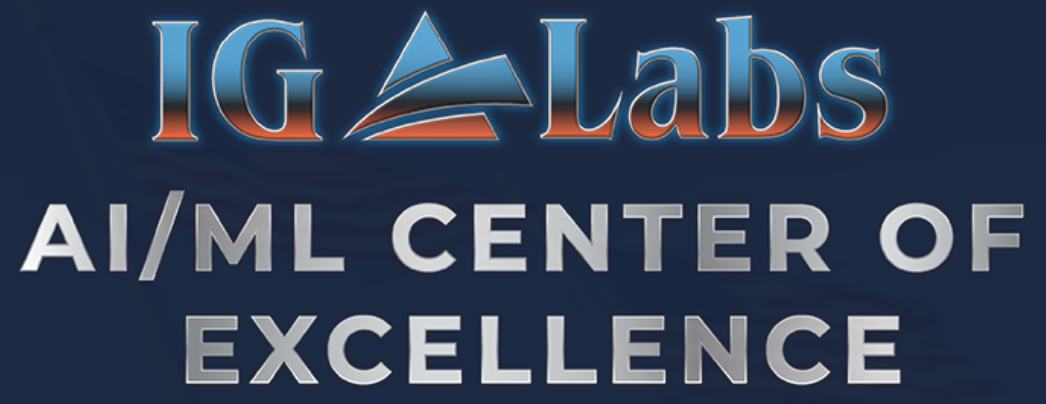
<h1>Geo Plotting with Python</h1>

<h2>Load the Appropriate Libraries</h2>

   __Pandas__ is an open source, easy-to-use data structures and analysis tools for the Python programming language.
    
   __Folium__ builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.
    
   __Json2html__ is a python wrapper to convert JSON into a human readable HTML Table representation.
    
    

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from json2html import *

<h2> Importing Data </h2>

Gathering the data to be processed can be accomplished in several ways. The two easiest ways is either though an http request to a __RESTFUL API__  interface on a data repositoy like the below cell using the Pandas library.

This rest call is requesting the Dangerous Buildings table from data.kcmo.org and is requesing that it be returned in the json format.

By utilizing the pandas '__read_json__' function, the reurned results will be placed in to a __Data Frame__. This data frame can then be iterated over and inspected so that we may glean information from it.

In [ ]:
df = pd.read_json('https://data.kcmo.org/resource/ax3m-jhxx.json').fillna(0)

In [ ]:
df.head()

This method ensures that you have the latest information, however, if you do not have network access you may have to load data that has been previously downloaded.

For loading data locally, simply provide the path to the data. For our case it is in the top level directory for the notebook so all we need to do is tell it the name of the file.

In [ ]:
df2 = pd.read_json('buildings.json')

<h2> Inspecting and Reviewing Data </h2>

Once the data is loaded, we need to check it for information. By typing in the the following you will retrieve specific information about the dataframe:

__df.shape__ displays row and column counts

__df__ displays the dataframe (partial)

__df.dtypes__ displays the columns and data types for the dataframe

__df.head(10)__ displays the first 10 records of the dataframe

In [ ]:
df.shape

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df.head(10)

In [ ]:
print(df.address[1])
print(df.address[100])

In [ ]:
print(df.location[0]['latitude'])
print(df.location[0]['longitude'])

<h2> Iterating Through the Values Within the Dataframe </h2>

In [ ]:
for i in range(0,len(df)):
    if 'latitude' in df.location[i]:
        print(df.location[i]['latitude'],df.location[i]['longitude'])

In [ ]:
mapping = folium.Map()
mapping

<h2>Basic Mapping of Buildings from Dataframe</h2>

In [ ]:
house_map = folium.Map(location=[39.015697, -94.565559],zoom_start=10)

for i in range(0,len(df)):
    if 'latitude' in df.location[i]:
        popup = ("Status: " + df["statusofcase"][i]);
        lat = df.location[i]['latitude'];
        lon = df.location[i]['longitude'];
        folium.Marker([lat,lon],popup=popup).add_to(house_map)

house_map

<h2>Mapping the Locations of the Buildings</h2>

In [ ]:
house_map2 = folium.Map(location=[39.117539, 	-94.553899],zoom_start=10)

In [ ]:
mc = MarkerCluster()

for i in range(0,len(df)):
    if 'latitude' in df.location[i]:
    
        lat = df.location[i]['latitude'];
        lon = df.location[i]['longitude'];
    
        recordz = df.loc[i];
        jsonz = pd.DataFrame.to_json(recordz);
        htmlz = json2html.convert(json = jsonz);
        marker_html = folium.Html(htmlz, script=True)
        popup = folium.Popup(marker_html, max_width= 1100)    
        
        mc.add_child(folium.Marker([lat,lon], popup=popup))
    
house_map2.add_child(mc)


folium.TileLayer('openstreetmap').add_to(house_map2)
folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Tiles &copy; Esri').add_to(house_map2)
folium.LayerControl().add_to(house_map2)

house_map2